# PC 8 : Résolution numérique d'équations différentielles ordinaires

**<big> Préparation avant la PC :</big>**
**Les question 1 des exercices 1 et 2 sont à préparer** avant la séance de PC.

In [2]:
# Ce package permet de travailler efficacement avec des tableaux
import numpy as np
# Ce package permet de faire des sorties graphiques
from matplotlib import pyplot as plt

from scipy.optimize import newton

## Exercice 1 : Méthodes de Runge-Kutta (RK)

On considère un problème de Cauchy de la forme

$$\left\{
\begin{aligned}
&y' = f(t,y)\\
&y(t_0) = y_0, 
\end{aligned}
\right.$$

avec un champ de vecteur $f:\mathbb{R}\times\mathbb{R} \to \mathbb{R}$ qu'on supposera aussi régulier que nécessaire. On cherche à résoudre ce problème de manière approchée aux temps $t_0<t_1<...<t_N=t_0+T$. On rappelle qu'on note $\Delta t_n = t_{n+1}-t_n$, et $\Delta t= \max\limits_{0\leq n\leq N} \Delta t_n$.

### Question 1 : méthode du point milieu explicite

La méthode du point de milieu explicite est définie par

$$ y_{n+1} = y_n + \Delta t_n f\left(t_n + \frac{\Delta t_n}{2},\quad{} y_n+\frac{\Delta t_n}{2}f(t_n,\ y_n)\right). $$

>C'est une méthode Runge Kutta d'ordre 2, et c'est celle qui est traditionnellement appelée RK2, même si ce n'est pas la seule méthode de Runge Kutta d'ordre 2. 

$1$. Montrer que, sous certaines hypothèse de régularité sur $f$, la méthode est consistante et d'ordre $2$, i.e. que l'erreur de consistance $E = O(\Delta t^2)$ où 

$$ E = \sum\limits_{n=0}^{N-1} |\varepsilon_n|, \qquad{} \varepsilon_n =  y(t_{n+1}) - y(t_n) - \Delta t_n f\left(t_n + \frac{\Delta t_n}{2},\quad{} y(t_n)+\frac{\Delta t_n}{2}f(t_n,\ y(t_n))\right). $$

*On pourra commencer par montrer que l'erreur locale de troncature $\varepsilon_n = O(\Delta t_n^3)$.*

>Remarque : comme on l'a vu dans la PC7, dès qu'un schéma est stable aux perturbations (comme le sont les schémas RK), l'erreur globale $\max\limits_{0\leq n\leq N} \vert y_n - y(t_n) \vert$ est du même ordre que l'erreur de consistance $E$.

$2$. **<font color=black><span style="background-color:skyblue">À rendre :</span></font>** 
- Implémenter la méthode RK2. 
- Tester la sur le cas $f(t,y)=y$, pour $t_0=0$, $y_0=1$ et $T=1$. 
- Afficher sur le même graphe la solution obtenue pour un pas de temps constant $\Delta t_n = \Delta t=2^{-5}$ et la solution théorique. 
- Tracer la courbe de convergence de $\max_{0\leq n \leq N } |y(t_n) - y_n|$ en fonction du nombre $N$ de pas de temps. Pour cela, prendre $N = 2^i$ avec $i$ entiers allant de 5 à 10. Vérifier qu'elle est en $O(\Delta t^2)$, c'est à dire que la méthode converge à l'ordre 2.

In [3]:
def f_1(t, x):
    return x

In [4]:
def RK2(f, y0, dt, T_f):
    """
    Calcule les itérés successifs y_n obtenus avec le schéma RK2
    ----------   
    parametres:
    f      : fonction second membre, dépend de t (en 1e argument) et de x (en 2nd argument)
    y_0    : valeur au temps t_0
    dt     : pas de temps (constant) 
    T_f    : temps final
    
    valeurs de retour:
    tab_y  : tableau contenant les valeurs de la solution y_n à chaque itération
    tab_t  : tableau contenant les temps t_n à chaque itération
    """
    N = round(T_f/dt)
    tab_t = np.linspace(0, T_f, N + 1)
    tab_y = np.zeros(N + 1)
    i = 0
    tab_y[0] = y0
    for i in range(N):
        tab_y[i + 1] = tab_y[i] + dt*f(tab_t[i] + dt/2, tab_y[i] + f(tab_t[i], tab_y[i])*dt/2)
    return tab_y, tab_t

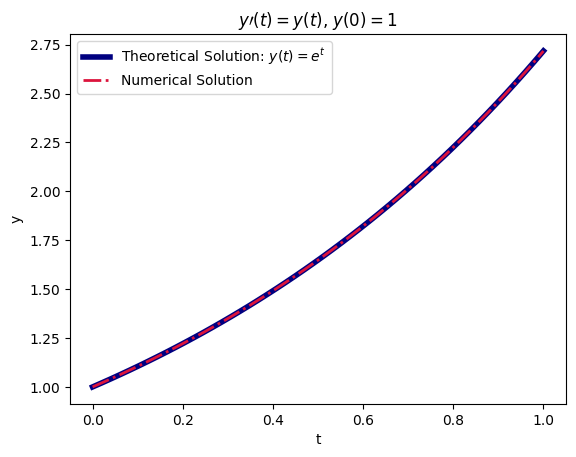

In [5]:
# Tester votre algorithme avec f1 comme second membre et avec les paramètres donnés
# Comparer avec la solution exacte
T_f = 1
y0 = 1
dt = 2**(-5)
N = round(T_f/dt)

y_n, t_n = RK2(f_1, y0, dt, T_f)

plt.plot(np.linspace(0, T_f), np.exp(np.linspace(0, T_f)), label='Theoretical Solution: $y(t) = e^t$', color='navy', linewidth=4)
plt.plot(t_n, y_n, label=f'Numerical Solution', linewidth=2, color='crimson', linestyle='-.')
plt.title('$y\\prime(t) = y(t)$, $y(0) = 1$')
plt.ylabel('y')
plt.xlabel('t')
plt.legend()
plt.show()

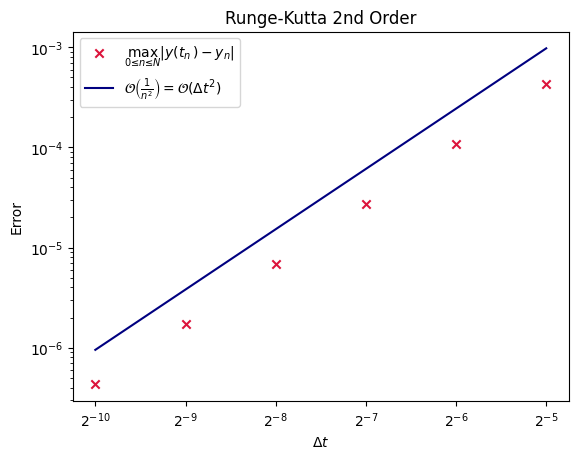

In [6]:
# Tracer la courbe de convergence en fonction de N en échelle loglog
# Comparer avec la courbe (Delta t)^2

T_f = 1
y0 = 1

ns = 2**np.arange(5, 11, dtype=np.int64)
dts = T_f/ns

error_n = [np.max(np.abs(y_ns - np.exp(t_ns))) for dt in dts for y_ns, t_ns in [RK2(f_1, y0, dt, T_f)]]

plt.scatter(dts, error_n, color='crimson', marker='x', label='$\\max_{0\\leq n \\leq N } |y(t_n) - y_n|$')
plt.plot([2**(-5), 2**(-10)], [2**(-10), 2**(-20)], color='navy', label='$\\mathcal{O}\\left(\\frac{1}{n^2}\\right) = \\mathcal{O}(\\Delta t^2)$')
plt.semilogx(base=2)
plt.semilogy(base=10)
plt.xlabel('$\\Delta t$')
plt.ylabel('Error')
plt.title('Runge-Kutta 2nd Order')
plt.legend()
plt.show()

### Question 2 : méthode RK4
Il existe de nombreuses méthodes de Runge-Kutta d'ordre 4, mais celle qui est communément nommmée RK4 est définie de la façon suivante :

$$ y_{n+1} = y_n+\frac{\Delta t_n}{6}(k_1+2k_2+2k_3+k_4),$$

où

$$\begin{aligned}
	    k_1 & = f(t_n, \ y_n), \\
	    k_2 & = f\left(t_n+\frac{\Delta t_n}{2},\ y_n+\frac{\Delta t_n}{2}k_1\right), \\
	    k_3 & = f\left(t_n+\frac{\Delta t_n}{2},\ y_n+\frac{\Delta t_n}{2}k_2\right), \\
	    k_4 & = f(t_n+\Delta t_n,\ y_n+\Delta t_n k_3).
	\end{aligned}$$
>
> Les $k_i$ dépendent de $n$, mais on omet souvent cette dépendance dans les notations pour alléger un peu l'écriture de ces schémas.
>   

**<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>** Implémenter la méthode RK4, la tester sur le même exemple que pour RK2, et vérifier numériquement que cette méthode est d'ordre 4.

In [7]:
def RK4(f, y0, dt, T_f):
    """
    Calcule les itérés successifs y_n obtenus avec le schéma RK4
    ----------   
    parametres:
    f      : fonction second membre, dépend de t (en 1e argument) et de x (en 2nd argument)
    y_0    : valeur au temps t_0
    dt     : pas de temps (constant) 
    T_f    : temps final
    
    valeurs de retour:
    tab_y  : tableau contenant les valeurs y_n à chaque itération 
    tab_t  : tableau contenant les temps t_n à chaque itération
    """  
    N = round(T_f/dt)
    tab_t = np.linspace(0, T_f, N + 1)
    tab_y = np.zeros(N + 1)
    i = 0
    tab_y[0] = y0
    for i in range(N):
        k1 = f(tab_t[i], tab_y[i])
        k2 = f(tab_t[i] + dt/2, tab_y[i] + k1*dt/2)
        k3 = f(tab_t[i] + dt/2, tab_y[i] + k2*dt/2)
        k4 = f(tab_t[i] + dt, tab_y[i] + k3*dt)
        tab_y[i + 1] = tab_y[i] + (k1 + 2*k2 + 2*k3 + k4)*dt/6
    return tab_y, tab_t

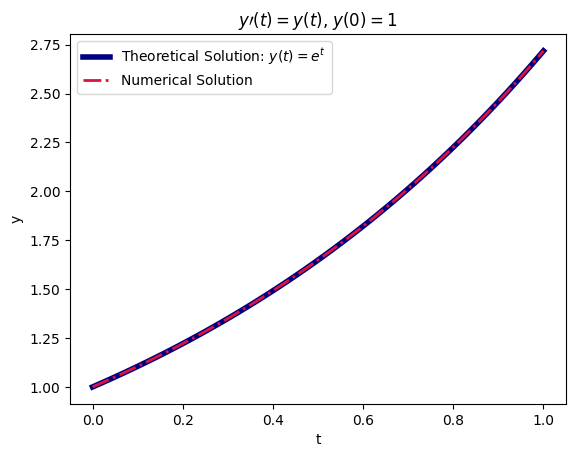

In [8]:
# Tester numériquement votre algorithme 
# Comparer avec la solution analytique

T_f = 1
y0 = 1
dt = 2**(-5)
N = round(T_f/dt)

y_n, t_n = RK4(f_1, y0, dt, T_f)

plt.plot(np.linspace(0, T_f), np.exp(np.linspace(0, T_f)), label='Theoretical Solution: $y(t) = e^t$', color='navy', linewidth=4)
plt.plot(t_n, y_n, label=f'Numerical Solution', linewidth=2, color='crimson', linestyle='-.')
plt.title('$y\\prime(t) = y(t)$, $y(0) = 1$')
plt.ylabel('y')
plt.xlabel('t')
plt.legend()
plt.show()

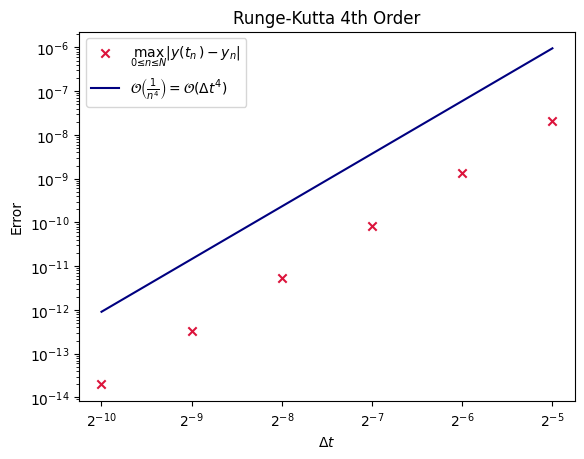

In [9]:
# Tracer la courbe de convergence en fonction de N en échelle loglog
# Comparer avec la courbe (Delta t)^4

T_f = 1
y0 = 1

ns = 2**np.arange(5, 11, dtype=np.int64)
dts = T_f/ns

error_n = [np.max(np.abs(y_ns - np.exp(t_ns))) for dt in dts for y_ns, t_ns in [RK4(f_1, y0, dt, T_f)]]

plt.scatter(dts, error_n, color='crimson', marker='x', label='$\\max_{0\\leq n \\leq N } |y(t_n) - y_n|$')
plt.plot([2**(-5), 2**(-10)], [2**(-20), 2**(-40)], color='navy', label='$\\mathcal{O}\\left(\\frac{1}{n^4}\\right) = \\mathcal{O}(\\Delta t^4)$')
plt.semilogx(base=2)
plt.semilogy(base=10)
plt.xlabel('$\\Delta t$')
plt.ylabel('Error')
plt.title('Runge-Kutta 4th Order')
plt.legend()
plt.show()

### Question 3 : méthode du point milieu implicite

On considère une méthode RK de la forme suivante

$$\left\{
\begin{aligned}
 k_n &= f\left( t_n + c \Delta t_n, \quad{} y_n + a k_n \Delta t_n\right) \qquad{}& (1a)\\
y_{n+1} &= y_n + b k_n \Delta t_n, \qquad{}&(1b)
\end{aligned}
\right. $$

où $a, b, c \in \mathbb{R}$ sont des constantes.

$1$. En supposant $f$ globalement lipschitizienne par rapport à la deuxième variable et $\Delta t$ suffisamment petit, montrer qu'il existe un unique $k_n$ satisfaisant (1a). 

$2$. $a$. Écrire le développement limité de $y(t_n + \Delta t_n)$ jusqu'à l'ordre $O(\Delta t_n^3)$ en fonction de $f$ et de ses dérivées.

$b$. De même, écrire un développement limité de $k_{n}$ faisant apparaitre les mêmes dérivées et ne faisant pas apparaître $k_n$.

$c$. Comparer $y(t_n + \Delta t_n)$ et $y_{n+1}$ et déterminer $a$, $b$ et $c$ tel que la méthode (1) soit d'ordre supérieur ou égale à 2. 

$3$. On définit $y_{n+\frac{1}{2}} = y_n + \frac{\Delta t_n}{2}k_{n}$. Réécrire le schéma correspondant sans faire apparaitre $k_{n}$ et justifier l'appelation *méthode du point milieu implicite*.

$4$. **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>** Implémenter la méthode du point milieu implicite sur le même cas qu'à la question 1 et vérifier numériquement son ordre. 
*On utilisera un algorithme de Newton pour la résolution de l'équation non-linéaire comme pour le schéma d'Euler implicite à la PC7.*

In [10]:
def Newton_scalaire(g, dg, x0, tol=1.e-12, N_max=100):
    """
    Calcule une solution approchée du problème g(x)=0 par la méthode de Newton
    ----------   
    parametres:
    g     : fonction dont on cherche le zero
    dg    : fonction dérivée de g
    x_0   : valeur initiale de la suite
    tol   : on utilise | g(x_n) | < tol comme critère d'arrêt 
    N_max : nombre maximal d'itérations
    
    valeurs de retour:
    x  : x_n à la dernière itération
    
    !!! afficher un message d'avertissement si on n'a pas convergé (si on n'a pas | g(x) | < tol) !!!
    """  
    x, r = newton(g, x0, dg, tol=tol, maxiter=N_max, disp=False, full_output=True)
    if not r.converged:
        print("Warning! Did not converge.")
    return x

In [11]:
# Cellule de test pour valider votre fonction Newton_scalaire (voir tests unitaires de la PC5)
# ou pour tester scipy.optimize.newton

x = Newton_scalaire(g=lambda x: x**2, dg=lambda x: 2*x, x0=2)

assert np.abs(x**2) < 1.e-12

x = Newton_scalaire(g=lambda x: x**2 + 1, dg=lambda x: 2*x, x0=2)

Warning! Did not converge.


In [12]:
def pt_milieu_implicite(f, df, y0, dt, T_f):
    """
    Calcule les itérés successifs y_n obtenus avec le schéma du point milieu implicite
    ----------   
    parametres:
    f       : fonction second membre, dépend de t (en 1e argument) et de x (en 2nd argument)
    df      : fonction drivére de f par rapport à x (2nd argument)
    y_0     : valeur au temps t_0
    dt      : pas de temps (constant)
    T_f     : temps final
    
    valeurs de retour:
    tab_y  : tableau contenant les valeurs de la solution y_n à chaque itération
    tab_t  : tableau contenant les temps t_n à chaque itération
    """
    # --- Bloc à modifier et à placer dans votre fonction ---
    # construire la fonction satisfaite par y_n+1 et sa dérivée à partir de f et df
    def g(x):
        # fonction dont on cherche le zéro 
        return x - f(tab_t[i] + c*dt, tab_y[i] + a*x*dt)
    def dg(x):
        # dérivée de la fonction dont on cherche le zéro 
        return 1 - a*dt*df(tab_t[i] + c*dt, tab_y[i] + a*x*dt)
    # --- Fin du bloc ---
    a = 0.5
    b = 1
    c = 0.5

    N = round(T_f/dt)
    tab_t = np.linspace(0, T_f, N + 1)
    tab_y = np.zeros(N + 1)
    tab_y[0] = y0

    for i in range(N):
        k = Newton_scalaire(g, dg, f(tab_t[i], tab_y[i])/b)
        tab_y[i + 1] = tab_y[i] + b*k*dt

    return tab_y, tab_t

In [13]:
# Tester votre algorithme sur f_1
def f_1(t, y):
    # fonction second membre
    return y

def df_1(t, y):
    # fonction dérivée de f_1 en fonction de y
    return  1


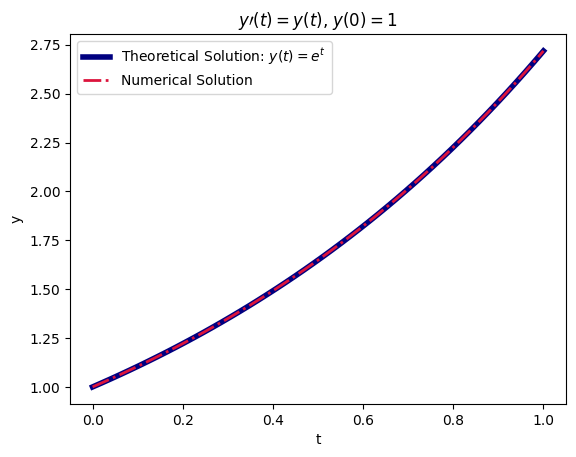

In [14]:
# Tracer la solution numérique obtenue avec le schéma du point milieu implicite
# Comparer à la solution exacte 

T_f = 1
y0 = 1
dt = 2**(-5)
N = round(T_f/dt)

y_n, t_n = pt_milieu_implicite(f_1, df_1, y0, dt, T_f)

plt.plot(np.linspace(0, T_f), np.exp(np.linspace(0, T_f)), label='Theoretical Solution: $y(t) = e^t$', color='navy', linewidth=4)
plt.plot(t_n, y_n, label=f'Numerical Solution', linewidth=2, color='crimson', linestyle='-.')
plt.title('$y\\prime(t) = y(t)$, $y(0) = 1$')
plt.ylabel('y')
plt.xlabel('t')
plt.legend()
plt.show()

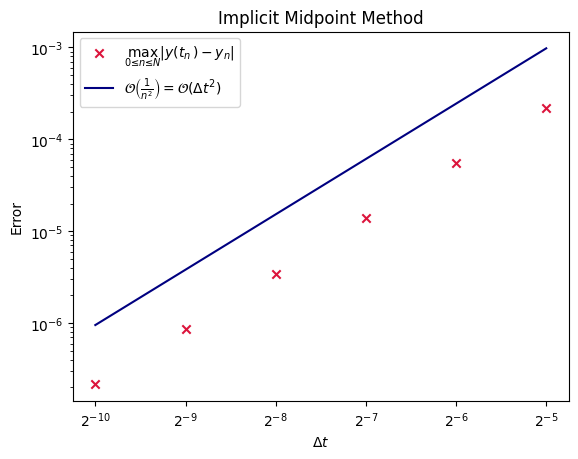

In [15]:
# Tracer la courbe de convergence en fonction de N en échelle loglog
# Comparer avec la courbe (Delta t)^2

T_f = 1
y0 = 1

ns = 2**np.arange(5, 11, dtype=np.int64)
dts = T_f/ns

error_n = [np.max(np.abs(y_ns - np.exp(t_ns))) for dt in dts for y_ns, t_ns in [pt_milieu_implicite(f_1, df_1, y0, dt, T_f)]]

plt.scatter(dts, error_n, color='crimson', marker='x', label='$\\max_{0\\leq n \\leq N } |y(t_n) - y_n|$')
plt.plot([2**(-5), 2**(-10)], [2**(-10), 2**(-20)], color='navy', label='$\\mathcal{O}\\left(\\frac{1}{n^2}\\right) = \\mathcal{O}(\\Delta t^2)$')
plt.semilogx(base=2)
plt.semilogy(base=10)
plt.xlabel('$\\Delta t$')
plt.ylabel('Error')
plt.title('Implicit Midpoint Method')
plt.legend()
plt.show()

### Question 4 : tableaux de Butcher
>Considérons maintenant une méthode de Runge-Kutta explicite générale, avec $q \geq 1$ étapes intermédiaires utilisées pour passer de $y_n$ à $y_{n+1}$. La valeur $y_{n+1}$ est donc calculée de la manière suivante
>
>$$ y_{n+1} = y_n + \Delta t_n \sum_{j=1}^q b_j k_j,$$
>
>où les $k_i$ sont définis par
>	
>$$\begin{array}{ccl}
	k_1 & = & f\left(t_n, \ y_n\right) \\ 
	k_2 & = & f\left(t_n+c_2\Delta t_n, \ y_n+\Delta t_n(a_{21}k_1)\right)\\
	k_3 & = & f\left(t_n+c_3\Delta t_n, \ y_n+\Delta t_n(a_{31}k_1+a_{32}k_2)\right)\\
	\vdots & \vdots & \vdots \\
	k_q & = & f\left(t_n+c_q\Delta t_n, \ y_n+\Delta t_n(a_{q1}k_1+...+a_{q,q-1}k_{q-1})\right).
	\end{array}$$
>
>La méthode obtenue est donc caractérisée par le nombre d'étapes $q$ et par les coefficients $(a_{ij})_{1 \leq j<i \leq q}$, $(b_j)_{j=1,...,q}$ et $(c_i)_{i=2,...,q}$. Toutes ces informations peuvent êtres regroupées dans un tableau de Butcher (nommé après John C. Butcher)
>
>$$\begin{array}{c|ccccc}
	0 & 0 & 0& 0& 0& 0 \\
	c_2 & a_{21} & 0& 0& 0 & 0\\
	c_3 & a_{31} & a_{32} & 0& 0 & 0 \\
	\vdots & \vdots & & \ddots &0 & 0   \\ 
	c_q & a_{q1} & a_{q2} & \cdots & a_{q,q-1} & 0   \\
	\hline 
	& b_1 & b_2 & \cdots &b_{q-1} & b_q 
	\end{array}$$

$1$. Écrire les tableaux de Butcher associées aux méthodes RK2 et RK4 décrites dans les questions précédents.

$2$. Implémenter une fonction qui prend en argument les tableaux $A = (a_{i,j})_{i,j = 1, \dots, p}, B = (b_i)_{i=1,\dots,p}, C = (c_i)_{i=1,\dots,p}$ décrits ci-haut (notamment $A$ strictement triangulaire inférieur), et qui calcule la solution numérique obtenue par la méthode RK explicite associée aux tableaux. Tester sur le même exemple que ci-dessus, et vérifier que vous obtenez bien le même résultat.

>L'implémentation à l'aide des tableaux est un peu plus délicate, mais permet de changer de méthode RK simplement en changeant de tableau.

In [ ]:
def RK_Butcher(f, y0, dt, T_f, A, B, C):
    """
    Calcule les itérés successifs y_n obtenus avec le schéma RK explicite décrit par les coefficients A, B et C
    ----------   
    parametres:
    f       : fonction second membre, dépend de t (en 1e argument) et de x (en 2nd argument)
    y_0     : valeur au temps t_0
    dt      : pas de temps (constant)
    T_f     : temps final
    A       : matrice de taille qxq, triangulaire inférieure et de diagonale nulle
    B       : vecteur de taille q
    C       : vecteur de taille q
    
    valeurs de retour:
    tab_y  : tableau contenant les valeurs y_n à chaque itération
    tab_t  : tableau contenant les temps t_n à chaque itération
    """
    
    return 

In [ ]:
# Définir les tableaux de Butcher de RK2 et tester votre algorithme 
# Comparer avec votre implémentation de RK2 sur la fonction f1


In [ ]:
# Définir les tableaux de Butcher de RK4 et tester votre algorithme 
# Comparer avec votre implémentation de RK4 sur la fonction f1


$3$. Remarquez que la matrice $A$ du tableau de Butcher ci-haut est strictement triangulaire inférieure. A quelle hypothèse qu'on a faite au départ cette structure est-elle liée?

**Réponse :**

## Exercice 2 : Un système conservatif

>On considère l'oscillateur harmonique
>
>$$ q''+q=0, $$
>
>qu'on réécrit comme un système d'ordre 1 à deux variables :
>
>$$ \left\{ \begin{aligned}
q'&=p\\
p'&=-q.
\end{aligned} \right. \qquad{} (2) $$
>
>*$q$ peut être interprété comme une position, et $p$ comme une vitesse.*


### Question 1 : Une propriété importante du système continu

Montrer que le hamiltonien $\mathcal{H}(q,p)=\frac{1}{2}(p^2+q^2)$ (parfois aussi appelé énergie), est conservé au cours du temps pour toute solution de (2).

### Question 2 : Schéma d'ordre 1

$1$. Ecrire explicitement les relations de récurrence entre $(q_{n+1},p_{n+1})$ et $(q_{n},p_{n})$ définies par les schémas d'Euler explicite et implicite.  En particulier, montrer que le schéma implicite ne nécessite pas la résolution d'une équation non-linéaire pour ce problème. 

$2$. Calculer explicitement la suite $\mathcal{H}(q_{n},p_{n})$ en fonction de $n$, $\Delta t$ et $\mathcal{H}(q_0,p_0)$ pour les schéma d'Euler explicite et implicite.

$3$. **<font color=black><span style="background-color:skyblue">À rendre :</span></font>** 

$a$. Implémenter les schéma d'Euler explicite et implicite pour le système (2).

$b$. Tester avec $\Delta t_n = \Delta t = 2^{-5}$, $(q_0,p_0) = (1,0)$ et $T=2^4$ (i.e. $N=2^9$ pas de temps) et tracer $p_n$ et $q_n$ en fonction du temps, ainsi que la solution analytique.

$c$. Tracer dans le plan de phase $(q,p)$ la solution obtenue avec les schémas d'Euler explicite, implicite et la solution analytique, c'est-à-dire avec $p$ en abscisse et $q$ en ordonnée.

$d$. Tracer l'hamiltonien $\mathcal{H}(q,p)$ en fonction du temps, pour les deux schémas et pour la solution analytique. 

$e$. Commenter les valeurs du Hamiltonien et les conséquences sur les courbes $p$ et $q$ en fonction du temps et dans le plan de phase $(q, p)$.

In [16]:
#a)
def Euler_explicite_oscillateur(q0, p0, dt, T_f):
    """
    Calcule les itérés successifs y_n obtenus avec le schéma d'Euler explicite sur le problème (2)
    ----------   
    parametres :
    q0, p0 : conditions initiale
    dt     : pas de temps 
    T_f    : temps final
    
    valeurs de retour :
    (tab_q, tab_p, tab_t) : tableaux contenant les valeurs de p_n, q_n et t_n à chaque itération
    """
    N = round(T_f/dt)
    tab_t = np.linspace(0, T_f, N + 1)
    tab_q = np.zeros(N + 1)
    tab_p = np.zeros(N + 1)

    tab_q[0] = q0
    tab_p[0] = p0

    for i in range(N):
        tab_p[i + 1] = tab_p[i] - tab_q[i]*dt
        tab_q[i + 1] = tab_q[i] + tab_p[i]*dt

    return tab_q, tab_p, tab_t

In [17]:
def Euler_implicite_oscillateur(q0, p0, dt, T_f):
    """
    Calcule les itérés successifs y_n obtenus avec le schéma d'Euler implicite sur le problème (2)
    ----------   
    parametres :
    q0, p0 : conditions initiale
    dt     : pas de temps 
    T_f    : temps final
    
    valeurs de retour :
    (tab_q, tab_p, tab_t) : tableaux contenant les valeurs de p_n, q_n et t_n à chaque itération
    """
    N = round(T_f/dt)
    tab_t = np.linspace(0, T_f, N + 1)
    tab_q = np.zeros(N + 1)
    tab_p = np.zeros(N + 1)

    tab_q[0] = q0
    tab_p[0] = p0

    for i in range(N):
        tab_p[i + 1] = (tab_p[i] - tab_q[i]*dt)/(1 + dt**2)
        tab_q[i + 1] = (tab_q[i] + tab_p[i]*dt)/(1 + dt**2)

    return tab_q, tab_p, tab_t

In [18]:
#b)
# Tester les schémas d'Euler explicite et implicite sur ce cas test avec les paramètres donnés
N = 2**9
T_f = 2**4
dt = T_f/N
q0, p0 = 1, 0

qs_forward, ps_forward, ts_forward = Euler_explicite_oscillateur(q0, p0, dt, T_f)
qs_backward, ps_backward, ts_backward = Euler_implicite_oscillateur(q0, p0, dt, T_f)



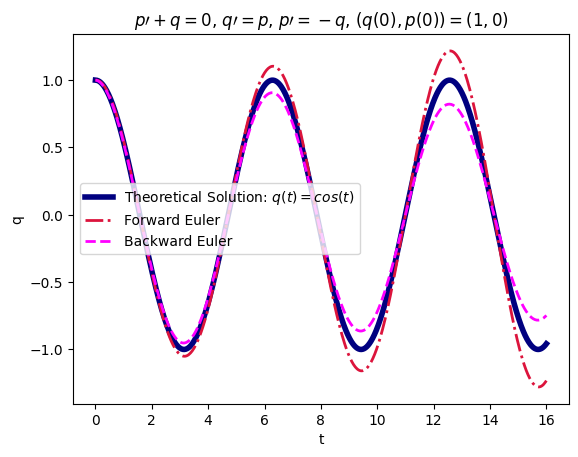

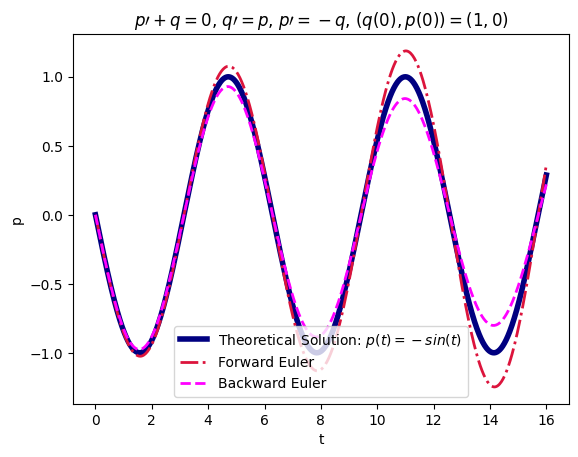

In [19]:
# Tracer les solutions pn et qn obtenues en fonction du temps t et comparer à la solution exacte 

plt.plot(np.linspace(0, T_f, 1000), np.cos(np.linspace(0, T_f, 1000)), label='Theoretical Solution: $q(t) = cos(t)$', color='navy', linewidth=4)
plt.plot(ts_forward, qs_forward, label=f'Forward Euler', linewidth=2, color='crimson', linestyle='-.')
plt.plot(ts_backward, qs_backward, label=f'Backward Euler', linewidth=2, color='fuchsia', linestyle='--')
plt.title('$p\\prime + q = 0$, $q\\prime = p$, $p\\prime = -q$, $(q(0), p(0)) = (1, 0)$')
plt.ylabel('q')
plt.xlabel('t')
plt.legend()
plt.show()

plt.plot(np.linspace(0, T_f, 1000), -np.sin(np.linspace(0, T_f, 1000)), label='Theoretical Solution: $p(t) = -sin(t)$', color='navy', linewidth=4)
plt.plot(ts_forward, ps_forward, label=f'Forward Euler', linewidth=2, color='crimson', linestyle='-.')
plt.plot(ts_backward, ps_backward, label=f'Backward Euler', linewidth=2, color='fuchsia', linestyle='--')
plt.title('$p\\prime + q = 0$, $q\\prime = p$, $p\\prime = -q$, $(q(0), p(0)) = (1, 0)$')
plt.ylabel('p')
plt.xlabel('t')
plt.legend()
plt.show()

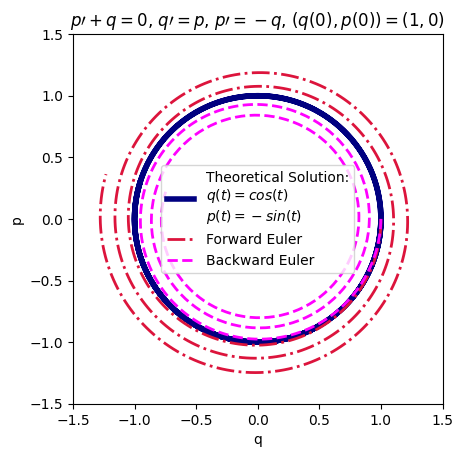

In [20]:
#c)
# Tracer les solutions numériques pn et qn et exacte p(tn), q(tn) dans le plan de phase (p,q) 
axes = plt.axes()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plt.axis('square')
plt.plot(np.cos(np.linspace(0, T_f, 1000)), -np.sin(np.linspace(0, T_f, 1000)), label='Theoretical Solution:\n$q(t) = cos(t)$\n$p(t) = -sin(t)$', color='navy', linewidth=4)
plt.plot(qs_forward, ps_forward, label=f'Forward Euler', linewidth=2, color='crimson', linestyle='-.')
plt.plot(qs_backward, ps_backward, label=f'Backward Euler', linewidth=2, color='fuchsia', linestyle='--')
plt.title('$p\\prime + q = 0$, $q\\prime = p$, $p\\prime = -q$, $(q(0), p(0)) = (1, 0)$')
plt.ylabel('p')
plt.xlabel('q')
plt.legend()
plt.show()

In [21]:
def H(q, p):
    # définition du Hamiltonien
    return (p**2+q**2)/2

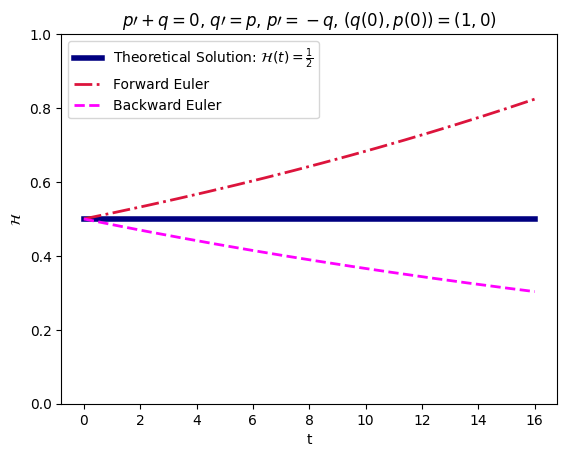

In [22]:
# Tracer H(pn,qn) pour les solutions numériques et H(p(tn),q(tn)) pour la solution exacte en fonction du temps 
axes = plt.axes()
axes.set_ylim([0, 1])
plt.plot([0, T_f], [0.5, 0.5], label='Theoretical Solution: $\\mathcal{H}(t) = \\frac{1}{2}$', color='navy', linewidth=4)
plt.plot(ts_forward, H(qs_forward, ps_forward), label=f'Forward Euler', linewidth=2, color='crimson', linestyle='-.')
plt.plot(ts_backward, H(qs_backward, ps_backward), label=f'Backward Euler', linewidth=2, color='fuchsia', linestyle='--')
plt.title('$p\\prime + q = 0$, $q\\prime = p$, $p\\prime = -q$, $(q(0), p(0)) = (1, 0)$')
plt.ylabel('$\\mathcal{H}$')
plt.xlabel('t')
plt.legend()
plt.show()

**Réponse :**

L'Hamiltonien (c'est à dire, l'énergie) croit pour la méthode explicite et décroit pour la méthode implicite. Les conséquences pour les courbes $q$ et $p$, c'est que les amplitudes augmentent pour la méthode explicite et baissent pour la méthode implicite. Dans le plan de phase, la méthode explicite crée une spirale qui va vers l'infini et la méthode implicite crée une spirale qui va vers zéro.

### Question 3 : Schéma d'ordre 2

$1$. Réécrire le schéma RK2 (décrit dans l'exercice précédent) adapté au système (2).

$2$. **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>** 

$a$. Implémenter le schéma RK2 pour le système (2).

$b$. Le tester avec $\Delta t_n = \Delta t = 2^{-3}$, $(q_0,p_0) = (1,0)$ et $T=2^8$ (i.e. $N=2^{11}$ pas de temps) et afficher $p_n$, $q_n$ et $\mathcal{H}(q_n,p_n)$ en fonction du temps ainsi que $(q_n,p_n)$ dans le plan de phase. Afficher à chaque fois également la solution analytique.

$c$. Commenter les résultats obtenus.

In [23]:
def RK2_oscillateur(q0, p0, dt, T_f):
    """
    Calcule les itérés successifs y_n obtenus avec le schéma RK2 sur le problème (2)
    ----------   
    parametres:
    q0, p0 : conditions initiale
    dt     : pas de temps 
    T_f    : temps final 
    
    valeurs de retour:
    (tab_q, tab_p, tab_t) : tableaux contenant les valeurs de p_n, q_n et t_n à chaque itération
    """
    N = round(T_f/dt)
    tab_t = np.linspace(0, T_f, N + 1)
    tab_q = np.zeros(N + 1)
    tab_p = np.zeros(N + 1)

    tab_q[0] = q0
    tab_p[0] = p0

    for i in range(N):
        tab_p[i + 1] = tab_p[i]*(1 - dt**2/2) - tab_q[i]*dt
        tab_q[i + 1] = tab_q[i]*(1 - dt**2/2) + tab_p[i]*dt

    return tab_q, tab_p, tab_t

In [24]:
# Tester votre implémentation avec les paramètres donnés
N = 2**11
T_f = 2**8
dt = T_f/N
q0, p0 = 1, 0

qs_RK2, ps_RK2, ts_RK2 = RK2_oscillateur(q0, p0, dt, T_f)

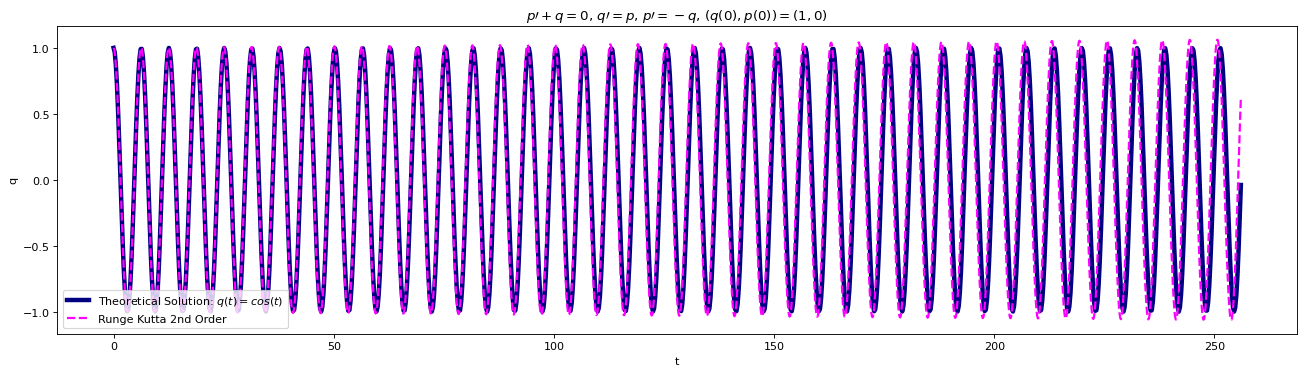

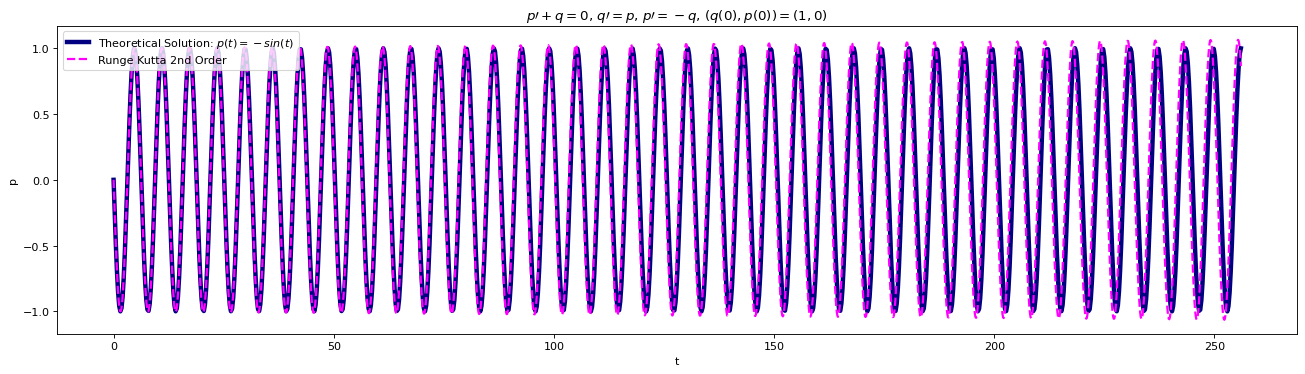

In [26]:
# Tracer pn et qn en fonction de tn 

plt.figure(figsize=(20, 5), dpi=80)

plt.plot(np.linspace(0, T_f, 1000), np.cos(np.linspace(0, T_f, 1000)), label='Theoretical Solution: $q(t) = cos(t)$', color='navy', linewidth=4)
plt.plot(ts_RK2, qs_RK2, label=f'Runge Kutta 2nd Order', linewidth=2, color='fuchsia', linestyle='--')
plt.title('$p\\prime + q = 0$, $q\\prime = p$, $p\\prime = -q$, $(q(0), p(0)) = (1, 0)$')
plt.ylabel('q')
plt.xlabel('t')
plt.legend(loc='lower left')
plt.show()

plt.figure(figsize=(20, 5), dpi=80)

plt.plot(np.linspace(0, T_f, 1000), -np.sin(np.linspace(0, T_f, 1000)), label='Theoretical Solution: $p(t) = -sin(t)$', color='navy', linewidth=4)
plt.plot(ts_RK2, ps_RK2, label=f'Runge Kutta 2nd Order', linewidth=2, color='fuchsia', linestyle='--')
plt.title('$p\\prime + q = 0$, $q\\prime = p$, $p\\prime = -q$, $(q(0), p(0)) = (1, 0)$')
plt.ylabel('p')
plt.xlabel('t')
plt.legend(loc='upper left')
plt.show()

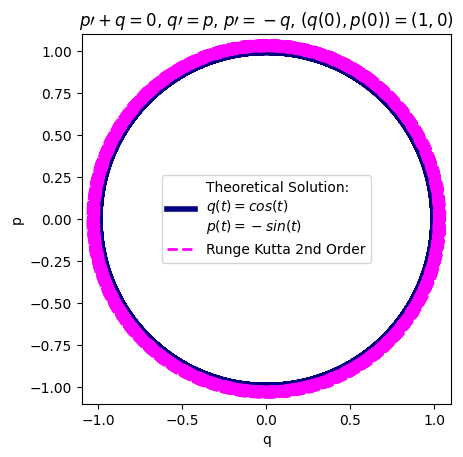

In [27]:
# Tracer pn et qn dans le plan de phase 
axes = plt.axes()
axes.set_xlim([-1.1, 1.1])
axes.set_ylim([-1.1, 1.1])
plt.axis('square')
plt.plot(np.cos(np.linspace(0, T_f, 1000)), -np.sin(np.linspace(0, T_f, 1000)), label='Theoretical Solution:\n$q(t) = cos(t)$\n$p(t) = -sin(t)$', color='navy', linewidth=4)
plt.plot(qs_RK2, ps_RK2, label=f'Runge Kutta 2nd Order', linewidth=2, color='fuchsia', linestyle='--')
plt.title('$p\\prime + q = 0$, $q\\prime = p$, $p\\prime = -q$, $(q(0), p(0)) = (1, 0)$')
plt.ylabel('p')
plt.xlabel('q')
plt.legend()
plt.show()

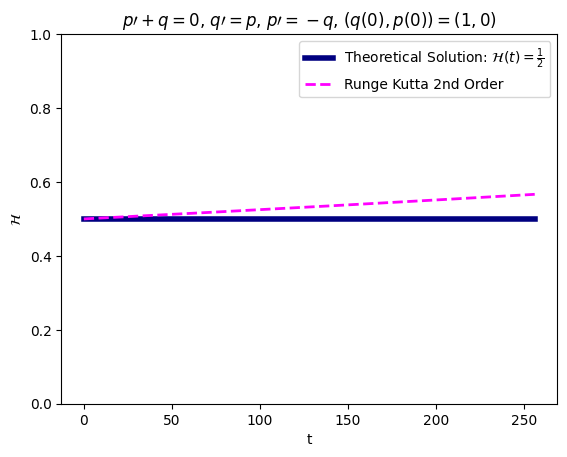

In [28]:
# Tracer H(pn,qn) en fonction de tn 
axes = plt.axes()
axes.set_ylim([0, 1])
plt.plot([0, T_f], [0.5, 0.5], label='Theoretical Solution: $\\mathcal{H}(t) = \\frac{1}{2}$', color='navy', linewidth=4)
plt.plot(ts_RK2, H(qs_RK2, ps_RK2), label=f'Runge Kutta 2nd Order', linewidth=2, color='fuchsia', linestyle='--')
plt.title('$p\\prime + q = 0$, $q\\prime = p$, $p\\prime = -q$, $(q(0), p(0)) = (1, 0)$')
plt.ylabel('$\\mathcal{H}$')
plt.xlabel('t')
plt.legend()
plt.show()

**Réponse :**

La méthode de Runge Kutta de seconde ordre est beaucoup plus précise que la d'Euler. On peut voir que l'énergie n'a augment que $0,067$, lorsque pour la méthode de Euler elle a augmente $0,32$. Alors, on a encore une augmentation des amplitudes pour $q$ et $p$, et la spirale vers l'infinie dans le plans de phase, mais c'est beaucoup plus subtil et l'effect est significativement moindre. Il faut beaucoup plus de temps pour que la différence soit importante.

### Question 4 : Schéma symplectique

On considère maintenant le schéma suivant

$$ \left\{ \begin{aligned}
    q_{n+1} &= q_n +\frac{\Delta t}{2}(p_n+p_{n+1}),\\
    p_{n+1} &= p_n -\frac{\Delta t}{2}(q_n+q_{n+1}).
  \end{aligned} \right. \qquad{} (3)$$

>Dans le cadre général des équations de la forme $y'=f(t,y)$, ce schéma s'écrit
>
>$$y_{n+1} = y_n + \Delta t f\left(t_n+\frac{\Delta t}{2},\ \frac{y_n+y_{n+1}}{2}\right). \qquad{} (4)$$
>
>Il est parfois également appelé méthode du point milieu implicite, mais on remarquera que ce n'est pas le même schéma que celui introduit à la question 2 de l'exercice 1! Le schéma (4) n'est pas un schéma de type Runge-Kutta.

$1$. Montrer que l'on peut obtenir une formulation explicite du schéma (3), c'est-à-dire écrire $q_{n+1}$ et $p_{n+1}$ comme une fonction de $q_n$ et de $p_n$

$$ (q_{n+1},p_{n+1}) = \phi_{\Delta t}(q_n,p_n). $$

Expliciter la fonction $\phi_{\Delta t}$.

$2$. **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>** 

$a$. Implémenter le schéma (3). *On utilisera la formule explicite $\phi_{\Delta t}$ obtenue à la question précédente.*

$b$. Tester avec à nouveau $\Delta t_n = \Delta t = 2^{-3}$, $(q_0,p_0) = (1,0)$ et $T=2^8$ (i.e. $N=2^{11}$ pas de temps) et afficher $p_n$, $q_n$ et $\mathcal{H}(q_n,p_n)$ en fonction du temps ainsi que $(q_n,p_n)$ dans le plan de phase. Afficher à chaque fois également la solution analytique.

$c$. On fixe maintenant $T=2^4$. Etudier numériquement l'ordre du schéma (3), en traçant $\max_{0\leq n \leq N } ||(q_n,p_n) -(q(t_n),p(t_n))||_{\infty}$ en fonction du nombre $N$ de pas de temps (i.e. avec $\Delta t=T/N$), et vérifier ce shcéma est également d'ordre 2. On prendre $N = 2^i$ pour $i$ entiers allant de 5 à 10.

$d$. Commenter l'ensemble des résultats obtenus et compararer les avantages et inconvénients du schéma symplectique par rapport aux schemas précédents. 

In [29]:
def symplectique_oscillateur(q0, p0, dt, T_f):
    """
    Calcule les itérés successifs y_n obtenus avec le schéma (3) sur le problème (2)
    ----------   
    parametres:
    q0, p0 : conditions initiale
    dt     : pas de temps 
    T_f    : temps final
    
    valeurs de retour:
    (tab_q, tab_p, tab_t) : tableaux contenant les valeurs de p_n, q_n et t_n à chaque itération
    """
    N = round(T_f/dt)
    tab_t = np.linspace(0, T_f, N + 1)
    tab_q = np.zeros(N + 1)
    tab_p = np.zeros(N + 1)

    tab_q[0] = q0
    tab_p[0] = p0

    for i in range(N):
        tab_p[i + 1] = (tab_p[i]*(1 - dt**2/4) - tab_q[i]*dt)/(1 + dt**2/4)
        tab_q[i + 1] = (tab_q[i]*(1 - dt**2/4) + tab_p[i]*dt)/(1 + dt**2/4)

    return tab_q, tab_p, tab_t

In [30]:
# Tester votre implémentation avec les paramètres donnés

N = 2**11
T_f = 2**8
dt = T_f/N
q0, p0 = 1, 0

qs_symp, ps_symp, ts_symp = symplectique_oscillateur(q0, p0, dt, T_f)

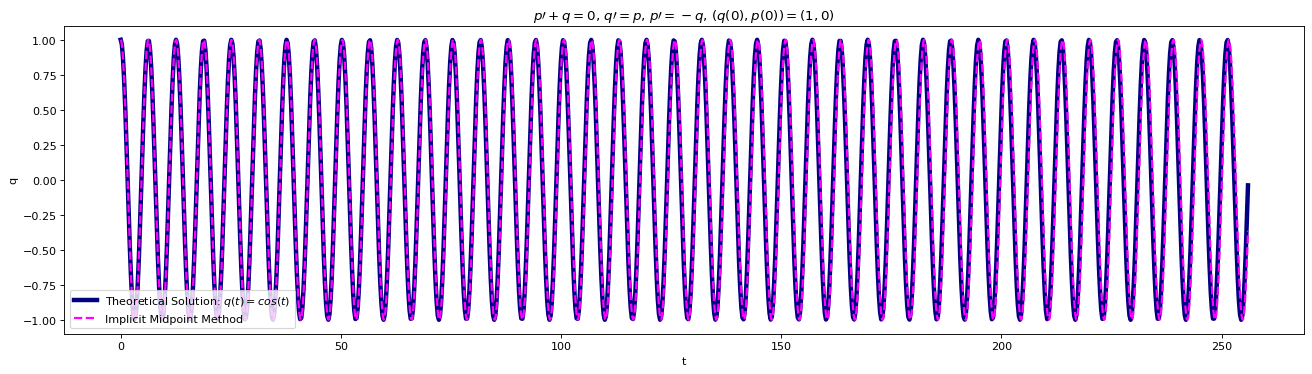

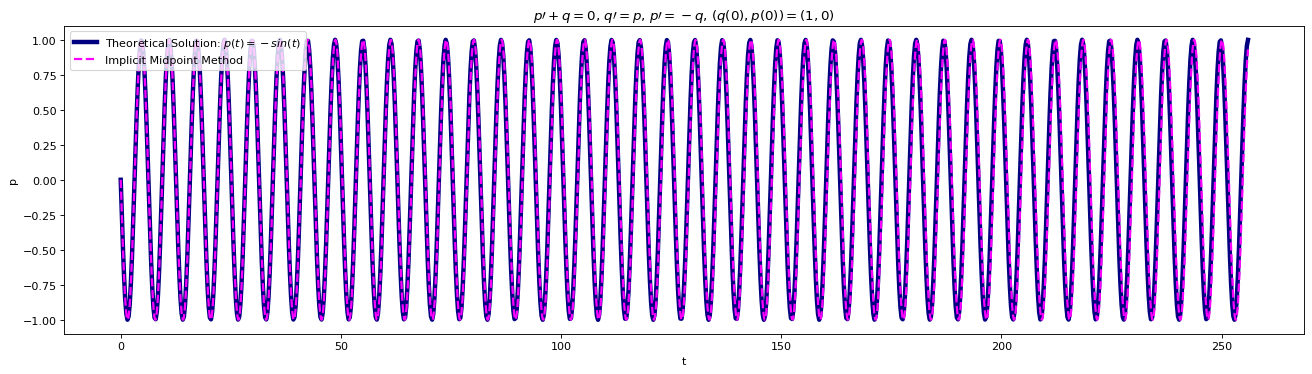

In [31]:
# Tracer les solutions numériques obtenues en fonction de tn et comparer à p(tn) et q(tn) exactes

plt.figure(figsize=(20, 5), dpi=80)

plt.plot(np.linspace(0, T_f, 1000), np.cos(np.linspace(0, T_f, 1000)), label='Theoretical Solution: $q(t) = cos(t)$', color='navy', linewidth=4)
plt.plot(ts_symp, qs_symp, label=f'Implicit Midpoint Method', linewidth=2, color='fuchsia', linestyle='--')
plt.title('$p\\prime + q = 0$, $q\\prime = p$, $p\\prime = -q$, $(q(0), p(0)) = (1, 0)$')
plt.ylabel('q')
plt.xlabel('t')
plt.legend(loc='lower left')
plt.show()

plt.figure(figsize=(20, 5), dpi=80)

plt.plot(np.linspace(0, T_f, 1000), -np.sin(np.linspace(0, T_f, 1000)), label='Theoretical Solution: $p(t) = -sin(t)$', color='navy', linewidth=4)
plt.plot(ts_symp, ps_symp, label=f'Implicit Midpoint Method', linewidth=2, color='fuchsia', linestyle='--')
plt.title('$p\\prime + q = 0$, $q\\prime = p$, $p\\prime = -q$, $(q(0), p(0)) = (1, 0)$')
plt.ylabel('p')
plt.xlabel('t')
plt.legend(loc='upper left')
plt.show()

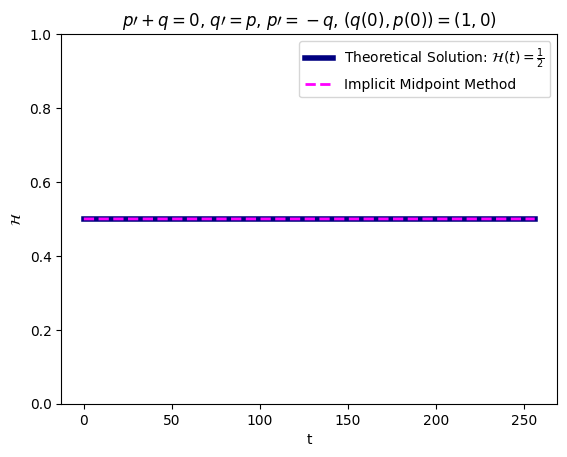

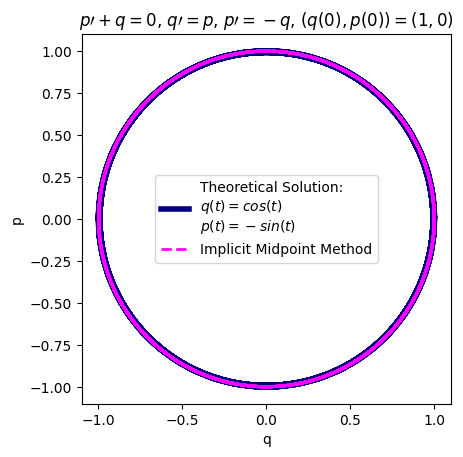

In [32]:
# Tracer H(pn,qn) en fonction de tn et comparer à H(p(tn),q(tn)) exacte et dans le plan de phase
axes = plt.axes()
axes.set_ylim([0, 1])
plt.plot([0, T_f], [0.5, 0.5], label='Theoretical Solution: $\\mathcal{H}(t) = \\frac{1}{2}$', color='navy', linewidth=4)
plt.plot(ts_symp, H(qs_symp, ps_symp), label=f'Implicit Midpoint Method', linewidth=2, color='fuchsia', linestyle='--')
plt.title('$p\\prime + q = 0$, $q\\prime = p$, $p\\prime = -q$, $(q(0), p(0)) = (1, 0)$')
plt.ylabel('$\\mathcal{H}$')
plt.xlabel('t')
plt.legend()
plt.show()

axes = plt.axes()
axes.set_xlim([-1.1, 1.1])
axes.set_ylim([-1.1, 1.1])
plt.axis('square')
plt.plot(np.cos(np.linspace(0, T_f, 1000)), -np.sin(np.linspace(0, T_f, 1000)), label='Theoretical Solution:\n$q(t) = cos(t)$\n$p(t) = -sin(t)$', color='navy', linewidth=4)
plt.plot(qs_symp, ps_symp, label=f'Implicit Midpoint Method', linewidth=2, color='fuchsia', linestyle='--')
plt.title('$p\\prime + q = 0$, $q\\prime = p$, $p\\prime = -q$, $(q(0), p(0)) = (1, 0)$')
plt.ylabel('p')
plt.xlabel('q')
plt.legend()
plt.show()


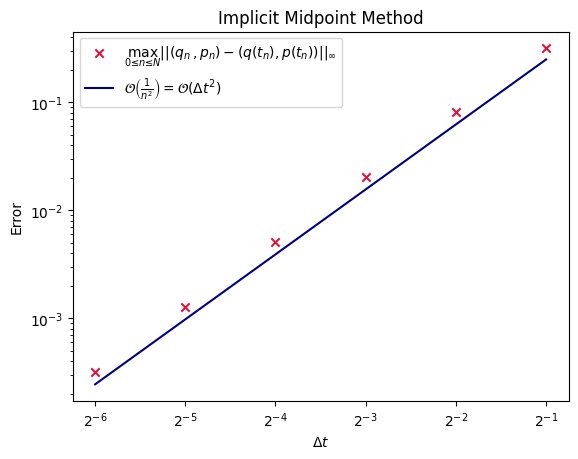

In [33]:
# Tracer la courbe d'erreur en fonction de N en échelle loglog

T_f = 2**4
q0, p0 = 1, 0

ns = 2**np.arange(5, 11, dtype=np.int64)
dts = T_f/ns

error_n = [np.max(np.abs(np.array([qs - np.cos(ts), ps + np.sin(ts)]))) for dt in dts for qs, ps, ts in [symplectique_oscillateur(q0, p0, dt, T_f)]]

plt.scatter(dts, error_n, color='crimson', marker='x', label='$\\max_{0\\leq n \\leq N } ||(q_n,p_n) -(q(t_n),p(t_n))||_{\\infty}$')
plt.plot([2**(-1), 2**(-6)], [2**(-2), 2**(-12)], color='navy', label='$\\mathcal{O}\\left(\\frac{1}{n^2}\\right) = \\mathcal{O}(\\Delta t^2)$')
plt.semilogx(base=2)
plt.semilogy(base=10)
plt.xlabel('$\\Delta t$')
plt.ylabel('Error')
plt.title('Implicit Midpoint Method')
plt.legend()
plt.show()

**Réponse :**

Dans ce cas, l'Hamiltonien n'a que changé de $4,1\cdot 10^{-15}$ qui est d'ordre de $\epsilon_M$. Ça résulte en une solution beaucoup plus juste que même Runge Kutta de seconde ordre, comme on peut voir dans le graphes de $q$ et $p$, et aussi le plan de phase.

Dans ce cas, cette méthode est la meilleure parmi les étudies. Ces avantages sont qu'elle est de d'ordre 2 et qu'elle conserve l'énergie. Son implementation est pareil aux autres et ne pose pas de difficulté. Alors, je ne vois que des avantages pour ce cas. Peut-être, il y a des cas où on ne peut pas trouver une formule explicite pour les itérations et ça serait un inconvénient, car il faudrait utiliser une autre méthode à chaque itération pour y trouver. 

$3$. Calculer explicitement $\mathcal{H}(q_{n},p_{n})$ en fonction de $n$, $\Delta t$ et $\mathcal{H}(q_0,p_0)$ pour ce schéma, et vérifier la cohérence avec les résultats numériques obtenus à la question précédente.

>On peut vérifier que le schéma (4) est sympleptique, c'est-à-dire qu'il vérifie
>
>$${}^T D\phi_{\Delta t}(q,p) \, J \,  D\phi_{\Delta t}(q,p) = J, \quad \text{ où } \quad
  J = \begin{pmatrix}
    0 & -1 \\
    1 &  0
  \end{pmatrix}.$$
>
>On peut montrer qu'un schéma symplectique appliqué à un système hamiltonien canonique conserve toujours une certaine quantité $\tilde {\mathcal{H}}_{\Delta t} (q_{n+1},p_{n+1})=\tilde {\mathcal{H}}_{\Delta t} (q_{n},p_{n})$. Généralement, on n'a pas exactement $\tilde {\mathcal{H}}_{\Delta t} = \mathcal{H}$, mais seulement $\tilde {\mathcal{H}}_{\Delta t} \underset{\Delta t\to 0}{\longrightarrow} \mathcal{H}$.

## Exercice 3 : Pas adaptatif
> On considère une EDO scalaire $y' = f(t,y)$ muni d'une condition initiale $y(0) = y_0$ satisfaisant où la fonction $f$ est $C^2$ en $t$ et en $y$. On étudie les schémas d'Euler explicite 
>
> $$ y_{E}^{n+1} = y^n + \Delta t_n f(t^n,y^n),$$ 
>
> et de Heun utilisant la valeur $y_E^{n+1}$ calculé par Euler explicite (on parle de schémas emboités)
>
> $$ y_{H}^{n+1} = y^n + \frac{\Delta t^n}{2}\left( f(t^n,y^n) + f(t^{n+1},y_E^{n+1})\right). $$
>
> On cherche un pas de temps $\Delta t_n$ adapté pour contrôler l'erreur locale de troncature $\epsilon^n$. Or cette erreur est calculée à partir de la valeur de la solution exacte qui n'est a priori pas connue. Nous avons donc besoin d'une estimation numérique de cette erreur. 

## Question 1: Estimation d'erreurs

$1$. Calculer l'erreur local de troncature $\epsilon_H^n$ pour le schéma de Heun et montrer qu'il est un ordre supérieur à $\epsilon_E^n$ celui d'Euler explicite. *On supposera $f$ aussi régulière que nécessaire.* 

$2$. En écrivant génériquement $\epsilon_\alpha^n = y(t^{n+1}) - y(t^n) - \Delta t^n \phi_\alpha(\Delta t^n, t^n, y(t^n))$ les erreurs locales de troncature de ces deux schémas, et 

$$\tilde{\epsilon}^n = \Delta t_n \left( \phi_H(\Delta t^n, t^n, y^n) - \phi_E(\Delta t^n, t^{n},y^{n}) \right),$$

montrer que 

$$ \epsilon_E^n = \tilde{\epsilon}^n + O(\Delta t_n^2).$$

$3$. Expliciter $\phi_H$ et $\phi_E$. 

> On remarquera dans la suite que cette estimation d'erreur $\tilde{\epsilon}^n$ ne dépend que de la solution numérique et peut donc être calculée.

## Question 2 : Implémentation

> En négligeant le terme en $O((\Delta t^n)^2)$ supposé petit, on écrit $\epsilon_E^n \approx \tilde{\epsilon}^n$ et on propose d'adapter le pas de temps à partir d'une certaine tolérance $TOL$ comme suit :
>
> Si $\tilde{\epsilon}^n < TOL$ alors
> > $y^{n+1} = y_H^{n+1}$
> >
> > Si $\tilde{\epsilon}^n < TOL/10$ alors
> > > $\Delta t^{n+1} = 2 \Delta t^n$
> > 
> > Sinon
> > 
> > >  $\Delta t^{n+1} = \Delta t^n$
>
> Sinon
> > Diviser $\Delta t^n$ par 2 et recommencer

$1$. Expliquer les choix effectués.

$2$. Implémenter ce schéma à pas adaptatif.

$3$. Tester le sur problème $y' = y$, avec les paramètres $y_0 = 1$, $\Delta t_0 = 2^{-3}$, $TOL = 2^{-6}$, $T_f = 1$, $N_{max} = 10000$ et $\Delta t_{min} = 2^{-8}$.

$4$. Tester le à nouveau sur le problème logistique $y' = k y(1-y)$ avec les paramètres $y_0 = 0.0001$, $\Delta t_0 = 2^{-3}$, $TOL = 2^{-6}$, $T_f = 2$, $N_{max} = 10000$ et $\Delta t_{min} = 2^{-8}$ et pour $k=10$, $k=30$ et $k=50$.

$5$. Expliquer l'évolution des pas de temps par rapport à la raideur du système et au comportement de la solution.

In [ ]:
def Euler_Heun_adaptatif(f, y0, dt0, TOL, T_f, N_max, dt_min):
    """
    Calcule les itérés successifs y_n obtenus avec le schéma emboité à pas adaptatif Euler explicite-Heun 
    ----------   
    parametres:
    f       : fonction second membre, dépend de t (en 1e argument) et de x (en 2nd argument)
    y_0     : valeur au temps t_0
    dt0     : pas de temps initial
    TOL     : tolerance sur l'erreur
    T_f     : temps final
    N_max   : nombre maximale d'itération en temps
    dt_min  : taille minimal du pas de temps
    
    valeurs de retour:
    tab_y  : tableau contenant les valeurs de la solution y_n à chaque itération
    tab_t  : tableau contenant les temps t_n à chaque itération
    """

    return 

In [ ]:
K = 1.

def f_K(t, x):
    return K * x

In [ ]:
# Tester la méthode sur l'équation linéaire



In [ ]:
K = 10.

def f_logistique(t, x):
    return K * x * (1-x)

In [ ]:
# Tester la méthode sur l'équation logistique
